In [16]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


with open("lin_reg_training.csv", "r") as file:
    reader_data = csv.reader(file, delimiter = ',')
    data = np.array([[float(number) for number in row] for row in reader_data])
    y_train = data[:, 1]
    x_train = data[:, 0]
    x_train = x_train.reshape(1, -1)
    y_train = y_train.reshape(1, -1)

with open("lin_reg_training.csv", "r") as file:
    reader_data = csv.reader(file, delimiter = ',')
    data = np.array([[float(number) for number in row] for row in reader_data])
    y_test = data[:, 1]
    x_test = data[:, 0]
    x_test = x_test.reshape(1, -1)
    y_test = y_test.reshape(1, -1)

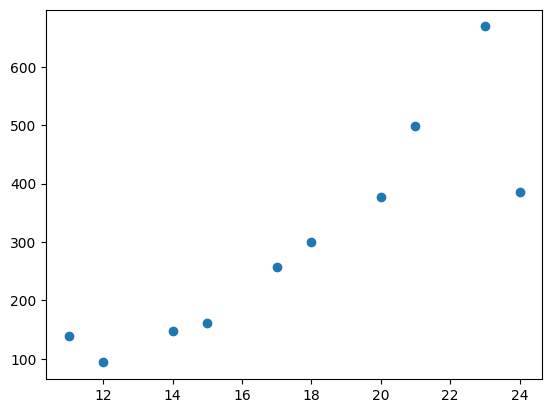

In [17]:
plt.scatter(x_train, y_train)

In [22]:
standard_scaler = StandardScaler()
standard_scaler.fit(x_train.T)
x_train_scaled = standard_scaler.transform(x_train.T)
x_test_scaled = standard_scaler.transform(x_test.T)

In [23]:
poly_features = PolynomialFeatures(degree=6)
x_train_poly = poly_features.fit_transform(x_train_scaled)
x_test_poly = poly_features.fit_transform(x_test_scaled)

def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return theta.T @ X # przykładowa realizacja, @ - mnożenie macierzowe

def calculate_cost(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = X.shape[1]
    return 1/(2*m)*np.sum(np.square((h_fun(X, theta) - y)))

def get_line(X, y, theta = np.array([[0], [0]]), eps = 1e-5, alpha = 0.001):
    prev_cost = calculate_cost(X, y, theta)
    m = X.shape[1]

    while(1):
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta = theta - (alpha/m) * gradient.T
        cost = calculate_cost(X, y, theta)
        if np.abs(cost - prev_cost) < eps:
            return (theta, cost)
        else:
            prev_cost = cost

(theta, cost) = get_line(x_train_poly.T, y_train, theta=np.array([[0], [0], [0], [0], [0], [0], [0]]))
print((theta, cost))

(array([[ 272.90556299],
       [  93.83130806],
       [ -17.91910796],
       [ 280.10870767],
       [ 164.10007486],
       [-123.2160235 ],
       [ -68.39777719]]), 58.34214799097505)
